In [1]:
import pandas as pd
import sys
sys.path.append('../scripts')
from plots import plot_histogram, plot_boxplot, calculate_correlations,generate_all_categorical_crosstabs, correlation_matrix
from preprocess import normalize_date, to_datetime, find_outliers, find_and_replace_outliers_with_median

In [2]:
DATA_PATH = '../data'

In [3]:

fraud_data = pd.read_csv(f'{DATA_PATH}/Fraud_Data.csv')

In [4]:
ip_data = pd.read_csv(f'{DATA_PATH}/IpAddress_to_Country.csv')

In [5]:
credit_carddata = pd.read_csv(f'{DATA_PATH}/creditcard.csv')

In [6]:
fraud_data = to_datetime(fraud_data,'purchase_time')
fraud_data = to_datetime(fraud_data, 'signup_time')

### Remove outliners

check and removes outliners from the fraud_data

In [24]:
fraud_data = find_and_replace_outliers_with_median(fraud_data, ['age'])
find_outliers(fraud_data)

Processing columns: ['age']
No outliers found in column 'age' using z-score threshold 3.
No outliers found in column 'user_id' using z-score threshold 3.
No outliers found in column 'purchase_value' using z-score threshold 3.
No outliers found in column 'age' using z-score threshold 3.
No outliers found in column 'ip_address' using z-score threshold 3.
Found 14151 outliers in column 'class'.


['class']

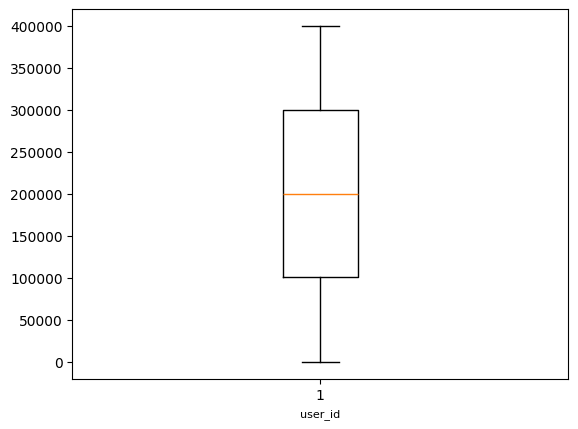

<Figure size 1000x700 with 0 Axes>

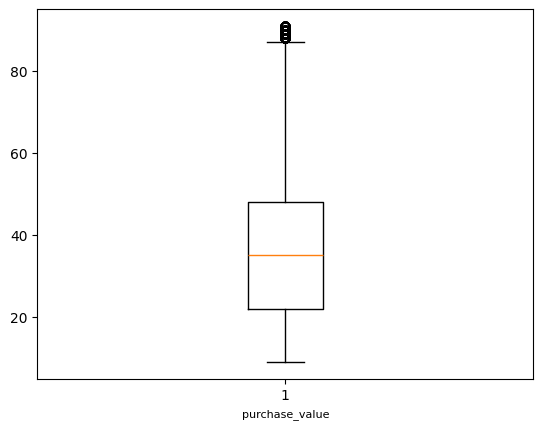

<Figure size 1000x700 with 0 Axes>

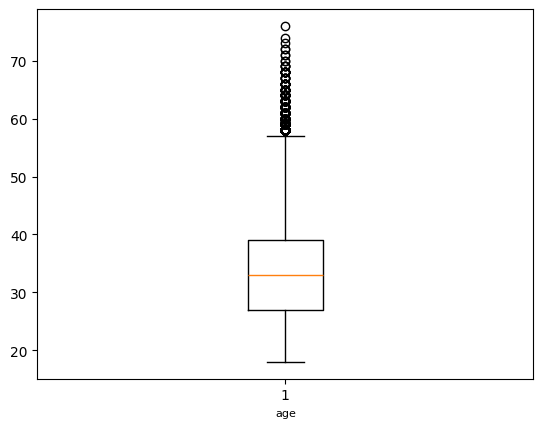

<Figure size 1000x700 with 0 Axes>

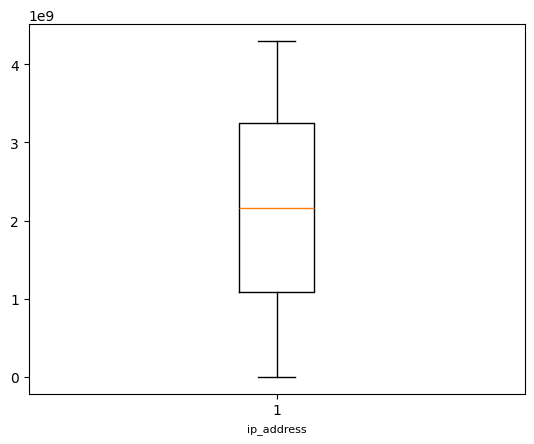

<Figure size 1000x700 with 0 Axes>

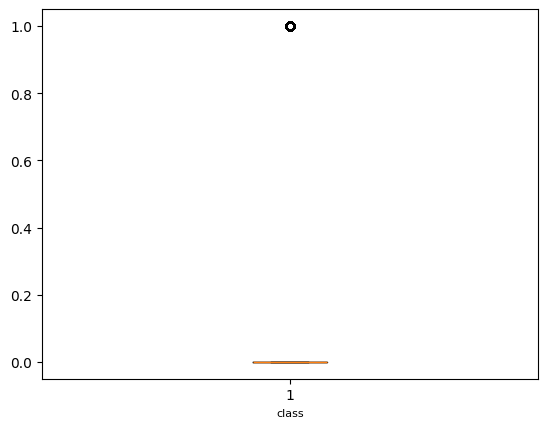

<Figure size 1000x700 with 0 Axes>

In [8]:
plot_boxplot(fraud_data,[])

## univariant analysis

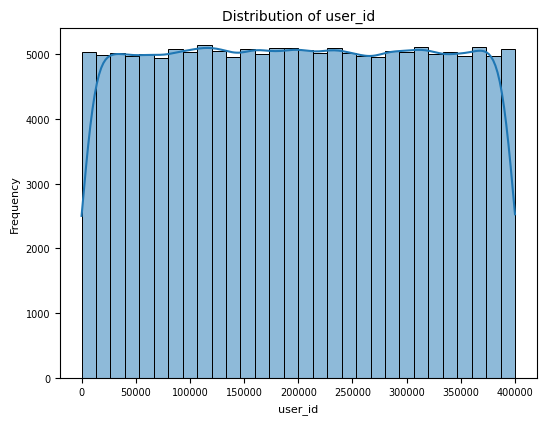

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(df_to_plot), x=col,


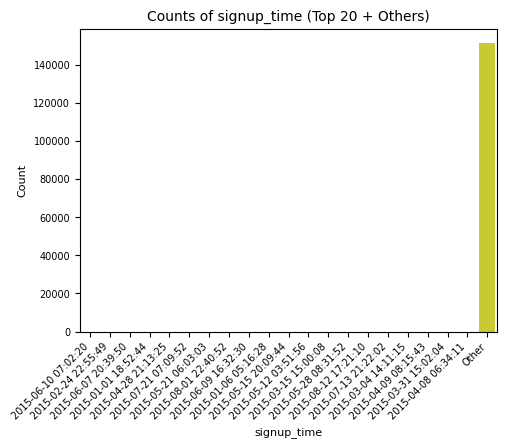

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(df_to_plot), x=col,


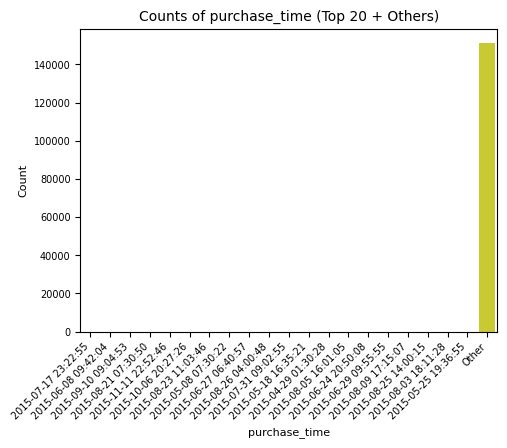

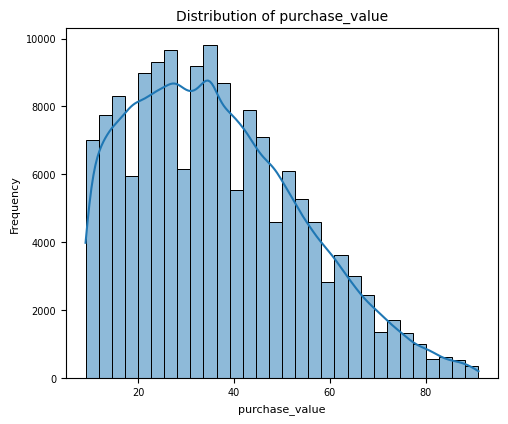

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame(df_to_plot), x=col,


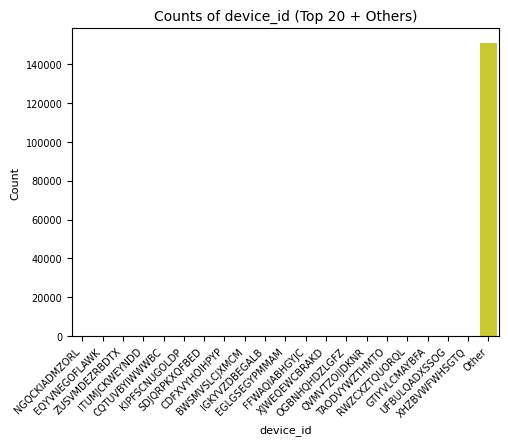

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=value_counts.index, palette='viridis', ax=ax)


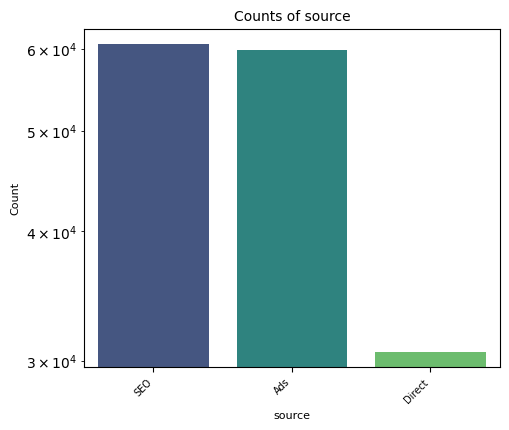

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=value_counts.index, palette='viridis', ax=ax)


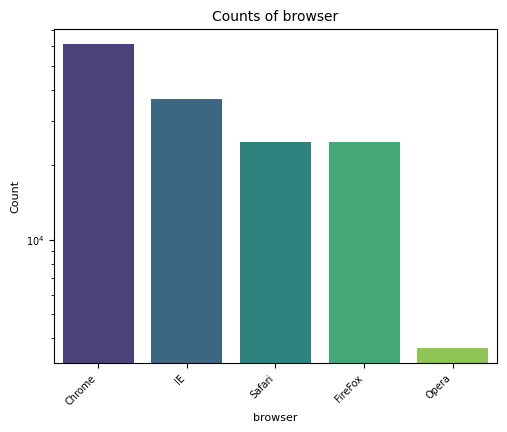

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/notebooks/../scripts/plots.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=value_counts.index, palette='viridis', ax=ax)


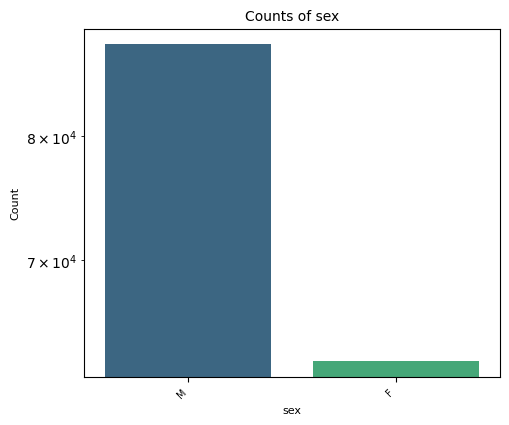

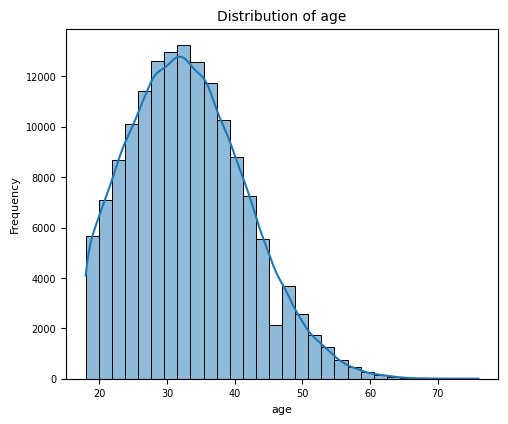

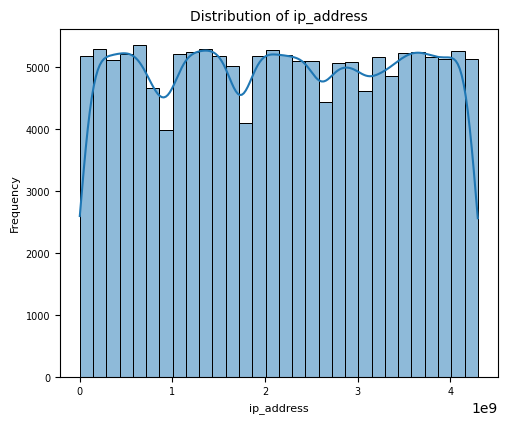

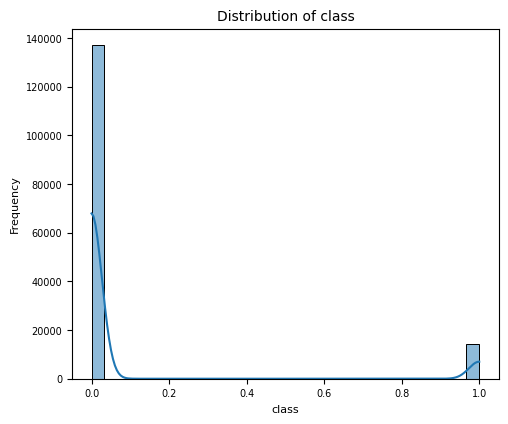

In [9]:
plot_histogram(fraud_data, [])

## bivariant analysis

In summary, this code snippet calculates the Pearson correlation matrix for your fraud_data and then visualizes this matrix as a heatmap, allowing you to quickly see the linear relationships between different features in your dataset.


--- Pearson Correlation Matrix ---
                 user_id  purchase_value       age  ip_address     class
user_id         1.000000        0.001818  0.000611   -0.003144  0.001945
purchase_value  0.001818        1.000000  0.002701    0.000594  0.001652
age             0.000611        0.002701  1.000000    0.001140  0.006624
ip_address     -0.003144        0.000594  0.001140    1.000000 -0.005208
class           0.001945        0.001652  0.006624   -0.005208  1.000000

--- Spearman Correlation Matrix ---
                 user_id  purchase_value       age  ip_address     class
user_id         1.000000        0.002314  0.001079   -0.003156  0.001945
purchase_value  0.002314        1.000000  0.002968    0.000867  0.001099
age             0.001079        0.002968  1.000000    0.001675  0.007507
ip_address     -0.003156        0.000867  0.001675    1.000000 -0.005271
class           0.001945        0.001099  0.007507   -0.005271  1.000000


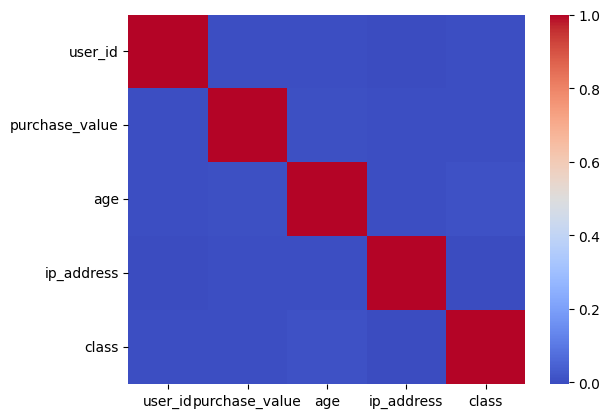

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
result = calculate_correlations(fraud_data)
sns.heatmap(result['pearson_corr'], cmap='coolwarm')
plt.show()


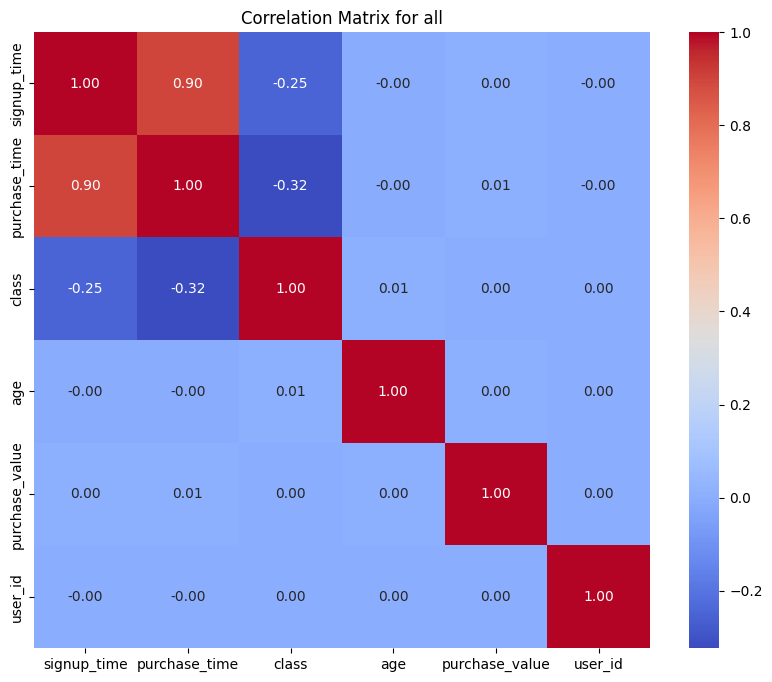

In [11]:
correlation_matrix(fraud_data,['signup_time', 'purchase_time','class','age', 'purchase_value', 'user_id'], 'all')

In [12]:
result = generate_all_categorical_crosstabs(fraud_data, normalize_method='index')

Found 4 categorical columns: ['device_id', 'source', 'browser', 'sex']

Generating contingency tables for all unique pairs...

--- Crosstab: 'device_id' vs 'source' ---
source         Ads  Direct  SEO
device_id                      
AAALBGNHHVMKG  0.0     1.0  0.0
AAAWIHVCQELTP  1.0     0.0  0.0
AAAXJHWCLISKY  1.0     0.0  0.0
AAAXXOZJRZRAO  1.0     0.0  0.0
AABFGRPBQHWFQ  1.0     0.0  0.0
...            ...     ...  ...
ZZZGSIJRNCXBJ  1.0     0.0  0.0
ZZZIKLJSVSQMF  1.0     0.0  0.0
ZZZKJIZHJEDFN  0.0     1.0  0.0
ZZZMVOGBAJVTM  1.0     0.0  0.0
ZZZXASJUVUNMV  0.0     1.0  0.0

[137956 rows x 3 columns]

--- Crosstab: 'device_id' vs 'browser' ---
browser        Chrome  FireFox   IE  Opera  Safari
device_id                                         
AAALBGNHHVMKG     1.0      0.0  0.0    0.0     0.0
AAAWIHVCQELTP     1.0      0.0  0.0    0.0     0.0
AAAXJHWCLISKY     0.0      0.0  1.0    0.0     0.0
AAAXXOZJRZRAO     0.0      1.0  0.0    0.0     0.0
AABFGRPBQHWFQ     0.0      0.0  0.0   


--- Pearson Correlation Matrix ---
            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.5768

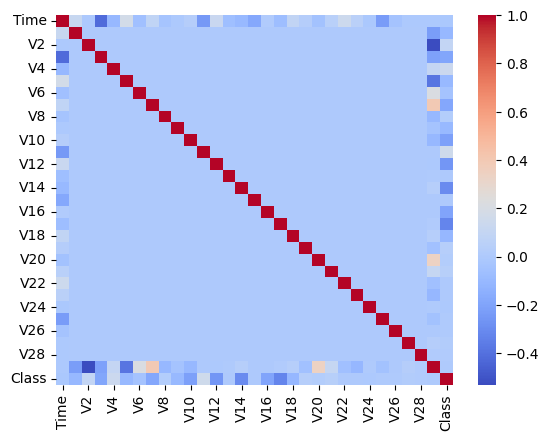

In [13]:
result = calculate_correlations(credit_carddata)
sns.heatmap(result['pearson_corr'], cmap='coolwarm')
plt.show()

## Merge IP dataset with fraud dataset

In [14]:
combined_data = pd.concat([fraud_data, ip_data], axis=1)

In [15]:
sorted_fraud = fraud_data.sort_values('ip_address')
sorted_ip = ip_data.sort_values('lower_bound_ip_address')
merged_df = pd.merge_asof(
    sorted_fraud,
    sorted_ip[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']],
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='forward',
    allow_exact_matches=True
)
fraud_ip_with_country = merged_df[(merged_df['ip_address'] < merged_df['upper_bound_ip_address']) & (merged_df['lower_bound_ip_address'] < merged_df['ip_address'])]

# result_countries = fraud_ip_with_country
# fraud_data['country'] = result_countries

In [16]:
def get_country_for_ip(ip, ip_data_df):
    """
    Finds the country for a given IP address within the ip_data_df ranges.
    """
    mask = (ip_data_df['lower_bound_ip_address'] <= ip) & \
           (ip < ip_data_df['upper_bound_ip_address'])
    
    # Check if there's a match
    if mask.any():
        # Return the country of the first match (assuming no overlapping ranges)
        return ip_data_df.loc[mask, 'country'].iloc[0]
    else:
        return None # Or some other default value like 'Unknown'

# Apply the function to each IP address in fraud_data
fraud_data['located_country'] = fraud_data['ip_address'].apply(
    lambda x: get_country_for_ip(x, ip_data)
)


In [17]:
fraud_data = fraud_data.drop_duplicates()

In [18]:
fraud_data['located_country'] = fraud_data['located_country'].ffill()

In [19]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'located_country'],
      dtype='object')

## Feature Engineering

To prepare raw fraud transaction data into a clean, class balanced, and numerically represented format, ready for machine learning model training

In [25]:
from feature_pipeline import process_frude, fraud_pipeline, credit_pipeline

In [27]:
def split_columns(df:pd.DataFrame, exclude:list[str]):
    """
    Splits the columns of a DataFrame into numerical and categorical lists based on their data types.

    Columns specified in the `exclude` list will be ignored and not included in either the
    numerical or categorical lists.

    Args:
        df (pd.DataFrame): The input DataFrame whose columns are to be split.
        exclude (list[str]): A list of column names to exclude from the splitting process.
                             These columns will not appear in the returned numerical or
                             categorical lists.

    Returns:
        tuple[list[str], list[str]]: A tuple containing two lists:
                                     - The first list contains the names of numerical columns.
                                     - The second list contains the names of categorical columns.
    """
    numerical_cols = []
    category_cols = []
    for col in df.columns:
        if col in exclude:
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            numerical_cols.append(col)
        else:
            category_cols.append(col)
    return (numerical_cols, category_cols)

setup the training and testing data from the eccommerce using the pipeline

In [28]:

numerical_cols, category_cols = split_columns(fraud_data, ['class'])
train_setup = process_frude(fraud_data, numerical_cols, category_cols, fraud_pipeline,'class')

['user_id', 'purchase_value', 'age', 'ip_address', 'signup_time', 'purchase_time', 'device_id', 'source', 'browser', 'sex', 'located_country']
Original Training Set Class Distribution:
class
0    95872
1     9906
Name: count, dtype: int64
--------------------------------------------------
Shape of X_train_processed_df after pipeline: (105778, 51)
First 5 rows of X_train_processed_df (features engineered, scaled, encoded):
        num__user_id  num__purchase_value  num__age  num__ip_address  \
61049       0.427657             0.309024 -0.241342        -0.597850   
141787     -0.868316             0.081820 -0.123010        -1.027313   
84407       0.879840            -1.395007  0.350318        -0.657122   
115800     -0.270130            -1.395007 -1.661327         0.321883   
61857       0.376487             0.252223 -0.596339         0.589787   

        minmax__user_id  minmax__purchase_value  minmax__age  \
61049          0.623096                  0.4125        0.325   
141787       

setup the training and testing data from the bank transaction using the pipeline

In [32]:
credit_numerical_cols, credit_category_cols = split_columns(credit_carddata,['Class'])
credit_train_setup = process_frude(credit_carddata, credit_numerical_cols, credit_category_cols, credit_pipeline,'Class')

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Original Training Set Class Distribution:
Class
0    199020
1       344
Name: count, dtype: int64
--------------------------------------------------
Shape of X_train_processed_df after pipeline: (199364, 30)
First 5 rows of X_train_processed_df (features engineered, scaled, encoded):
        num__Time   num__V1   num__V2   num__V3   num__V4   num__V5   num__V6  \
249927   1.257992 -0.005578  0.427819  0.108347 -0.534196  0.425864 -0.489116   
214082   0.939713  0.904109 -0.110138 -1.449361  0.840920  0.442776 -0.760782   
106005  -0.528960 -0.550544 -2.676901 -0.919977  0.331363 -1.496917 -0.573444   
58619   -0.977583 -0.263360  0.619460 -0.403529 -0.551463  1.783666  2.495035   
191638   0.725456 -0.325205  0.129183  0.187309 -1.261520  1.885635  3.011145   

         num__V7   num

### Model building and evaluation using f-score, confusion matrix and AUR-PR

#### for fraud data on eccommerce

i choose the eccomerce Random model because it has a more higher f-score and a better AUR-PR than the reset of the models 

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression Test Set Performance:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     41089
           1       0.27      0.62      0.37      4245

    accuracy                           0.80     45334
   macro avg       0.61      0.72      0.63     45334
weighted avg       0.89      0.80      0.84     45334

ROC AUC Score: 0.7199
Accuracy Score: 0.8046
Test AUC-PR (Average Precision Score):0.1995


/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


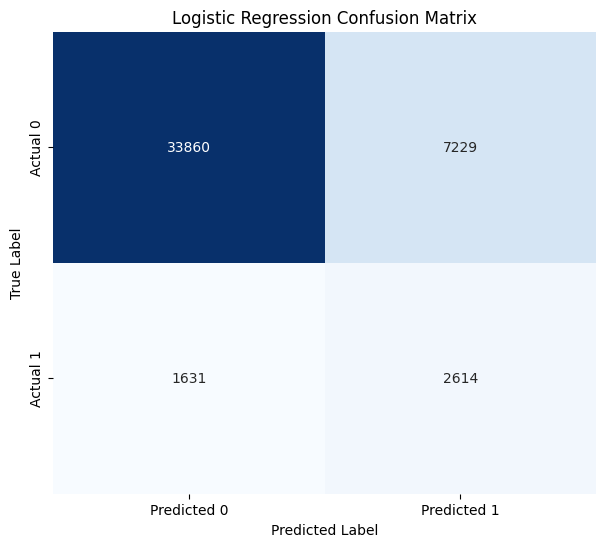

/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Random Forest Test Set Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.53      0.70      4245

    accuracy                           0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334

ROC AUC Score: 0.7665
Accuracy Score: 0.9563
Test AUC-PR (Average Precision Score):0.5768


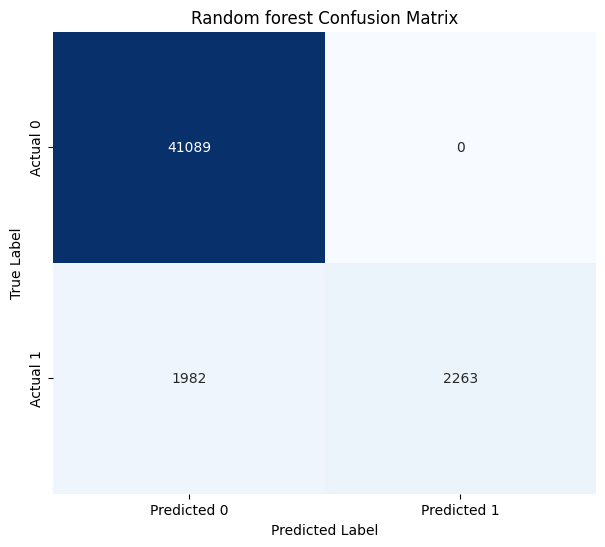

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix, accuracy_score
lr_params = {
            "solver": "lbfgs",
            "max_iter": 1000,
            "multi_class": "auto",
            "random_state": 8888,
}
tree_params = {
            'criterion':'log_loss',
            'max_depth':8,
            'min_samples_split':5,
            'min_samples_leaf':3,
            'max_features':0.7, # Use 70% of features
            'ccp_alpha':0.01,   # Apply some pruning
            'random_state':42
}

lr = LogisticRegression(**lr_params)
lr.fit(train_setup['x_train'], train_setup['y_train'])

y_predict = lr.predict(train_setup['x_test'])
print("\nLogistic Regression Test Set Performance:")
print(classification_report(train_setup['y_test'], y_predict))
print(f"ROC AUC Score: {roc_auc_score(train_setup['y_test'], y_predict):.4f}")
print(f"Accuracy Score: {accuracy_score(train_setup['y_test'], y_predict):.4f}")
print(f"Test AUC-PR (Average Precision Score):{average_precision_score(train_setup['y_test'], y_predict):.4f}")
plt.figure(figsize=(7, 6))
cm_lr = confusion_matrix(train_setup['y_test'], y_predict)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
tree = RandomForestClassifier(**tree_params)
tree.fit(train_setup['x_train'], train_setup['y_train'])
y_predict = tree.predict(train_setup['x_test'])
print("\nRandom Forest Test Set Performance:")
print(classification_report(train_setup['y_test'], y_predict))
print(f"ROC AUC Score: {roc_auc_score(train_setup['y_test'], y_predict):.4f}")
print(f"Accuracy Score: {accuracy_score(train_setup['y_test'], y_predict):.4f}")
print(f"Test AUC-PR (Average Precision Score):{average_precision_score(train_setup['y_test'], y_predict):.4f}")
plt.figure(figsize=(7, 6))
cm_lr = confusion_matrix(train_setup['y_test'], y_predict)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### for transaction data on Bank

In [ ]:
lr = LogisticRegression(**lr_params)
lr.fit(credit_train_setup['x_train'], credit_train_setup['y_train'])

y_predict = lr.predict(credit_train_setup['x_test'])
print("\nLogistic Regression Test Set Performance:")
print(classification_report(credit_train_setup['y_test'], y_predict))
print(f"ROC AUC Score: {roc_auc_score(credit_train_setup['y_test'], y_predict):.4f}")
print(f"Accuracy Score: {accuracy_score(credit_train_setup['y_test'], y_predict):.4f}")
print(f"Test AUC-PR (Average Precision Score):{average_precision_score(credit_train_setup['y_test'], y_predict):.4f}")
plt.figure(figsize=(7, 6))
cm_lr = confusion_matrix(credit_train_setup['y_test'], y_predict)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
tree = RandomForestClassifier(**tree_params)
tree.fit(credit_train_setup['x_train'], credit_train_setup['y_train'])
y_predict = tree.predict(credit_train_setup['x_test'])
print("\nRandom Forest Test Set Performance:")
print(classification_report(credit_train_setup['y_test'], y_predict))
print(f"ROC AUC Score: {roc_auc_score(credit_train_setup['y_test'], y_predict):.4f}")
print(f"Accuracy Score: {accuracy_score(credit_train_setup['y_test'], y_predict):.4f}")
print(f"Test AUC-PR (Average Precision Score):{average_precision_score(credit_train_setup['y_test'], y_predict):.4f}")
plt.figure(figsize=(7, 6))
cm_lr = confusion_matrix(credit_train_setup['y_test'], y_predict)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Best model explanation using shap

In [ ]:
import shap
feature_names = [f'{i}' for i in train_setup['x_train_processed_df'].columns]
explainer = shap.TreeExplainer(tree)
sharp_values = explainer.shap_values(train_setup['x_test'])
print("SHAP Summary Plot (Beeswarm):")
shap.summary_plot(sharp_values, train_setup['x_test'], feature_names=feature_names)

In [ ]:
shap.force_plot(sharp_values, train_setup['x_test'], feature_names=feature_names)

In [ ]:
explainer = shap.KernelExplainer(tree.predict_proba, shap.kmeans(train_setup['x_train'],100))
sharp_values = explainer.shap_values(train_setup['x_test'])
shap.force_plot(explainer.expected_value[0], sharp_values[...,0], train_setup['x_test'])

100%|██████████| 45334/45334 [17:36:53<00:00,  1.40s/it]        
/home/mikiask/anotherproject/Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-8-9/.venv/lib/python3.13/site-packages/shap/plots/_force.py:211: UserWarning: shap.plots.force is slow for many thousands of rows, try subsampling your data.
  warnings.warn("shap.plots.force is slow for many thousands of rows, try subsampling your data.")
